<a href="https://colab.research.google.com/github/ahnnoah/study/blob/main/Colab/2022/6_%EC%BB%AC%EB%9F%AC_%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN으로 컬러 이미지 분류하기
안노아

In [ ]:
# 1번 셀

# package 수입
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras.utils.np_utils import to_categorical
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dropout, InputLayer, Dense


In [ ]:
# 2번 셀

# 하이퍼 파라미터
MY_DROP = 0.1       # dropout에 사용
MY_EPOCH = 20       # 반복 학습 수
MY_BATCH = 500

라벨: [6]
학습용 입력 데이터: (50000, 32, 32, 3)
학습용 출력 데이터: (50000, 1)
평가용 입력 데이터: (10000, 32, 32, 3)
평가용 출력 데이터: (10000, 1)


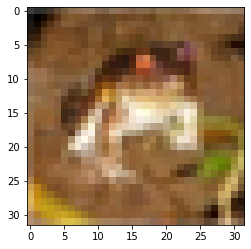

In [ ]:
# 3번 셀

# 데이터 불러 오기
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# 샘플 출력
#print(X_train[0])
plt.imshow(X_train[0])
print('라벨:', Y_train[0])

# 모양 확인
# 컬러 이미지는 3채널, 흑백 이미지는 1채널
print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)
print('평가용 입력 데이터:', X_test.shape)
print('평가용 출력 데이터:', Y_test.shape)

In [ ]:
# 4번 셀

# 데이터 추가 처리
# 입력 데이터 [0, 1] 스케일링
X_train = X_train / 255
X_test = X_test / 255

#print(X_train[0])
#plt.imshow(X_train[0])

# 출력 데이터 처리
print('전:', Y_train[0])
Y_train = to_categorical(Y_train, 10)
print('후:', Y_train[0])
Y_test = to_categorical(Y_test, 10)

print('학습용 입력 데이터:', X_train.shape)
print('학습용 출력 데이터:', Y_train.shape)
print('평가용 입력 데이터:', X_test.shape)
print('평가용 출력 데이터:', Y_test.shape)

전: [6]
후: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
학습용 입력 데이터: (50000, 32, 32, 3)
학습용 출력 데이터: (50000, 10)
평가용 입력 데이터: (10000, 32, 32, 3)
평가용 출력 데이터: (10000, 10)


In [ ]:
# 5번 셀

# CNN 구현
model = Sequential()

# 입력층
model.add(InputLayer(input_shape=(32, 32, 3)))

# 첫번째 합성곱 블럭
model.add(Conv2D(filters=16,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))
model.add(Dropout(MY_DROP))

# 두번째 합성곱 블럭
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))

# 후반부 시작
model.add(Flatten())
model.add(Dropout(MY_DROP))

# 첫번째 Dense 층
model.add(Dense(units=128,
                activation='relu'))
model.add(Dropout(MY_DROP))

# 출력층
model.add(Dense(units=10,
                activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1744      
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout_1 (Dropout)         (None, 8192)              0         
                                                        

In [ ]:
# 6번 셀

# CNN 학습
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

print('학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=1)

end = time()
print('총 학습 시간:', end - begin)


학습 시작
Epoch 1/20
100/100 [==============================] - 4s 24ms/step - loss: 1.8068 - acc: 0.3436
Epoch 2/20
100/100 [==============================] - 2s 24ms/step - loss: 1.4161 - acc: 0.4937
Epoch 3/20
100/100 [==============================] - 2s 24ms/step - loss: 1.2680 - acc: 0.5521
Epoch 4/20
100/100 [==============================] - 2s 24ms/step - loss: 1.1640 - acc: 0.5899
Epoch 5/20
100/100 [==============================] - 2s 24ms/step - loss: 1.0950 - acc: 0.6150
Epoch 6/20
100/100 [==============================] - 2s 23ms/step - loss: 1.0213 - acc: 0.6435
Epoch 7/20
100/100 [==============================] - 2s 24ms/step - loss: 0.9789 - acc: 0.6538
Epoch 8/20
100/100 [==============================] - 2s 23ms/step - loss: 0.9344 - acc: 0.6695
Epoch 9/20
100/100 [==============================] - 2s 24ms/step - loss: 0.8890 - acc: 0.6877
Epoch 10/20
100/100 [==============================] - 2s 24ms/step - loss: 0.8606 - acc: 0.6967
Epoch 11/20
100/100 [============

In [ ]:
# 7번 셀

# CNN 평가
score = model.evaluate(X_test,
                       Y_test)

print('최종 정확도:', score[1])


313/313 [==============================] - 1s 4ms/step - loss: 0.9952 - acc: 0.6805
최종 정확도: 0.6804999709129333


평가용 이미지 0번의 예측: [9.9861925e-04 5.4454088e-04 7.1777363e-04 8.4394819e-01 8.7721244e-04
 1.5123276e-01 5.8039284e-05 1.1876032e-04 1.0169279e-03 4.8710164e-04]
평가용 이미지 0번의 정답: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


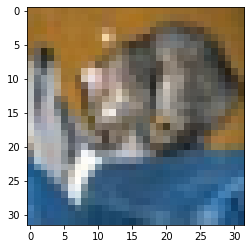

In [ ]:
# 8번 셀

# CNN 예측
pred = model.predict(X_test)

print('평가용 이미지 0번의 예측:', pred[0])
print('평가용 이미지 0번의 정답:', Y_test[0])
plt.imshow(X_test[0])
